<a href="https://colab.research.google.com/github/M-Borsuk/ChurnModelling/blob/main/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download the dataset here!**


<a href='https://www.kaggle.com/shubh0799/churn-modelling' > Link to the dataset from Kaggle.com </a>

# **Introduction into the problem**

<h1 align=center><strong>Customer churn</strong></h1>


---

<p align='center'><a  href='https://nbviewer.jupyter.org/github/M-Borsuk/ChurnModelling/blob/3f840f89b3483cd3e4559b5d5bc384292995b0df/ChurnModelling.ipynb' > View the notebook here for better readability </a></p>

<br>
<br>
<br>
<figure align=center>
  <img src='https://www.pointillist.com/wp-content/uploads/2017/11/Running-4-the-Exit-2-844x422.png' style='width:100%'>
  <figcaption align='center'> <a href='https://www.pointillist.com/blog/reduce-churn-customer-journey-analytics/' >Picture 1. General picture of churn</a> </figcaption>
 </figure>
<br>
<br>


---


<p align='center'> As we can read from <a href='https://en.wikipedia.org/wiki/Churn_rate'> Wikipedia</a> , <strong> The churn rate </strong> in a most basic form is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.<a href='https://en.wikipedia.org/wiki/Customer_rate' > [1] </a></p>
<br>
<p align='center'>
When it comes to <strong>customer churn</strong> infrastructures like <strong>banks, telephone service companies, internet service providers, pay TV companies, insurance firms, and alarm monitoring services</strong> often use customer churn rates analysis as one of their key business metrics, because the cost of <strong> retaining an existing customer </strong> is far less than <strong>acquiring a new one.</strong><a href='https://en.wikipedia.org/wiki/Customer_attrition' > [2] </a>
</p>
<br>
<p align='center'>
In the business context, <strong>churn</strong> refers both to <strong>customers migration,</strong> but also to their <strong>loss of value.</strong> <strong>Churn rate</strong> refers, on the one hand, to the <strong>percentage of customers who end their relation with the organization</strong>,but on the other hand, to the customers who <strong>still receive their services, but not as much or not as often as they used to</strong>. Current organizations face therefore a <strong>huge challenge</strong>.
The ability to anticipate to customers abandon in order to retain them results in <strong>gaining efficiency and competitivity</strong> in the market.There are <strong>advanced analytics tools and applications</strong>, especially designed to analyze in depth the enormous amount of <strong>data</strong> inside the organizations to make <strong>predictions</strong> based on the information obtained from <strong>analyzing and exploring those data.</strong><a href='https://en.wikipedia.org/wiki/Customer_attrition' > [2] </a> </p>


---


<br>
<figure align=center>
  <img src='https://drek4537l1klr.cloudfront.net/gold/v-7/Figures/02_img_0016.jpg' style='width:100%'>
  <figcaption align='center'> <a href='https://livebook.manning.com/book/fighting-churn-with-data/chapter-2/v-7/' > Diagram of the churn rate definition</a> </figcaption>
 </figure>
 <br>
 <br>
 <figure align=center>
  <img src='https://2021.ai/wp-content/uploads/2019/11/churn.png' style='width:100%'>
  <figcaption align='center'> <a href='https://imedicalsociety.org/pneumonia/' > How to predict the customer's exit with data modeling </a> </figcaption>
 </figure>
 <br>
 <br>


---



<p align='center'>
The goal of this project is to <strong>analyse and model the data</strong>, that came from the <strong>banking institution</strong>, that will allow the bussiness to <strong>gain information</strong> about their customers and <strong>predict</strong> their potential exit.
</p>
<p align='center'>
<br>
<br>


---

<br>
<p align='center'><strong>LET'S DIVE IN !</strong></p>
<br>


---

# **General modules imports**

In [337]:
!pip install plotly
!pip install imbalanced-learn
!pip install keras-tuner

In [338]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from scipy import stats
from scipy.stats import norm,mannwhitneyu,chi2_contingency
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input,BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import plotly.io as pio

# **Configuration and reading in the data**

In [339]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [340]:
pio.renderers.default = "notebook_connected"
#pio.renderers.default = "colab"

In [341]:
sns.set("poster","ticks")
sns.color_palette("tab10")
rcParams['figure.figsize'] = 6,8

In [342]:
df = pd.read_csv("/content/drive/My Drive/ChurnModel/Churn_Modelling.csv")

Let's get a quick view of the data aswell as some metrics about every column

In [343]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [345]:
df.describe()

RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]

First look at the data shows me a few things:


1.   No missing values in the dataset
2.   Columns like RowNumber, CustomerId and Surname most probably don't carry a lot of usable information in terms of EDA and model building
3.   Most of our customers are around 40 years old. Also the median and the mean of the age is only a little different. This might suggest a distribution close to gaussian
4.   At least 25% of our customers has a balance equal to zero.
5.   When it comes to estimated salary of the customers the mean and the median is also very close to each other.
6.   The target variable is highly imbalanced. At least 75% of our customers in the dataset didn't exit our company. It's pretty common in these types of problems. We will definitely need to adress this issue down the road
 


In [346]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [347]:
df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# **Explanatory data analysis**

---


Let's start by getting some insight of how our data looks in each of the columns

In [348]:
def plot_countplot(df,x):
  sns.countplot(x=x,data = df)
  plt.title("Distribution of {} values".format(x))
  plt.show()

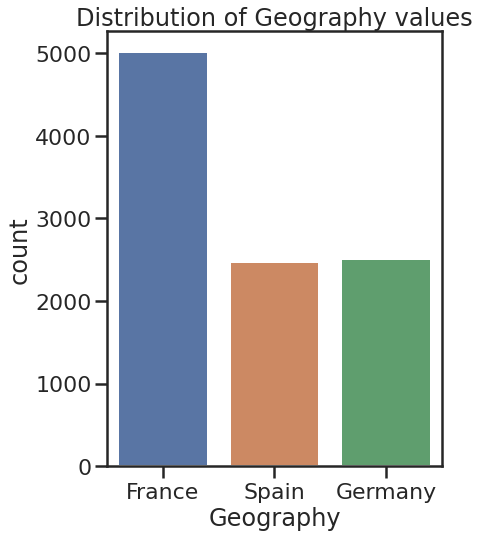

In [349]:
plot_countplot(df,"Geography")

Most of the customers in the dataset are from France.

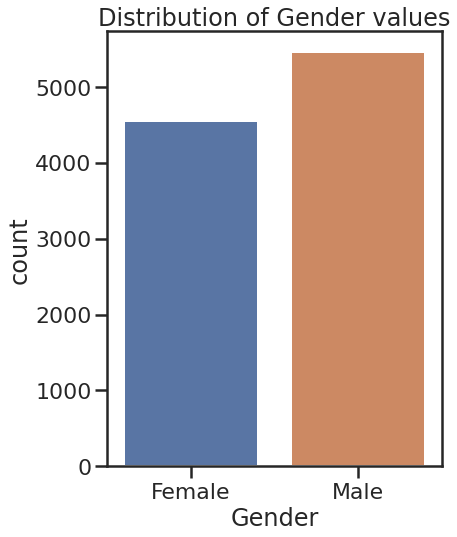

In [350]:
plot_countplot(df,"Gender")

The distribution of gender variable is slightly skewed towards males. Although, it's not a big difference.

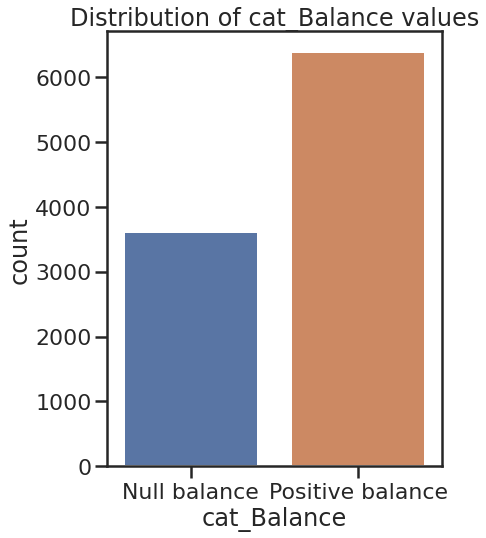

In [351]:
df["cat_Balance"] = df["Balance"].apply(lambda x: "Negative balance" if x < 0 else "Positive balance" if x > 0 else "Null balance")
plot_countplot(df,"cat_Balance")

I decided to create a temporary variable, which shows us how many customers have zero balance in their account. As we can see, approximately 1/3 of our customers have null balance. We already saw this dependency in the first look of our data, but this shows that this number actually exceeds 25% of customers.

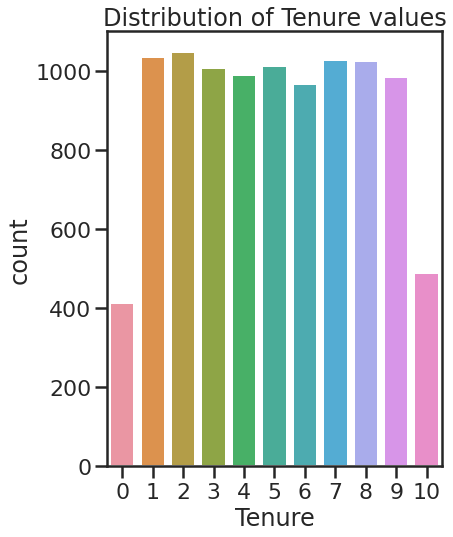

In [352]:
plot_countplot(df,"Tenure")

The tenure follows a distribution that looks like somehting related to uniform distribution, but with lower values with 10 years and 0 year of tenure.

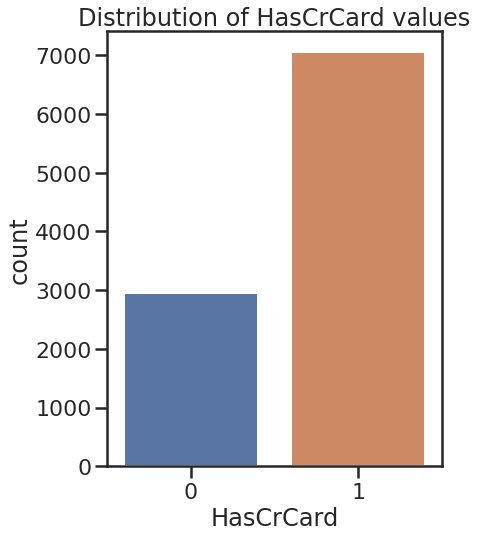

In [353]:
plot_countplot(df,"HasCrCard")

What this plot tells is that 70% of customers in our dataset has a credit card. Later on we will discover if it has a impact on a customer leaving

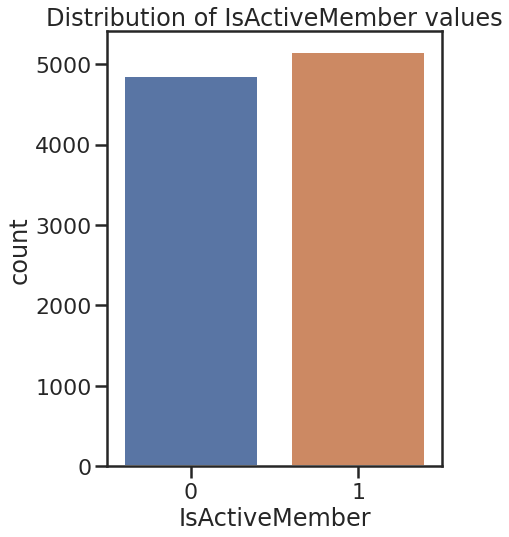

In [354]:
plot_countplot(df,"IsActiveMember")

Customers in our dataset are pretty much 50/50 between active and non active members. Later on we will discover if it has a impact on a customer leaving

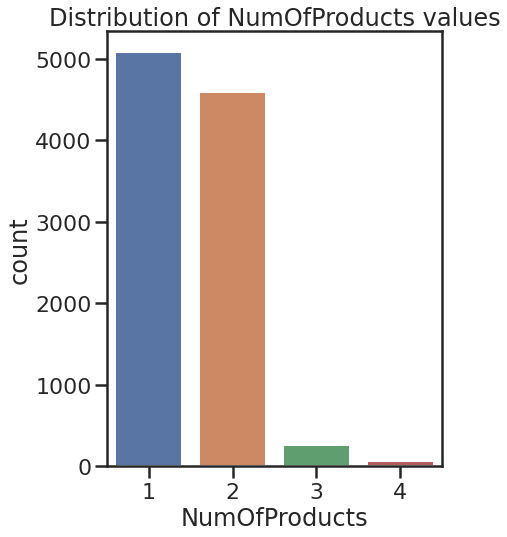

In [355]:
plot_countplot(df,"NumOfProducts")

Most of the customers has either one or two products in the company. We can also notice that some small number of them have three or four.

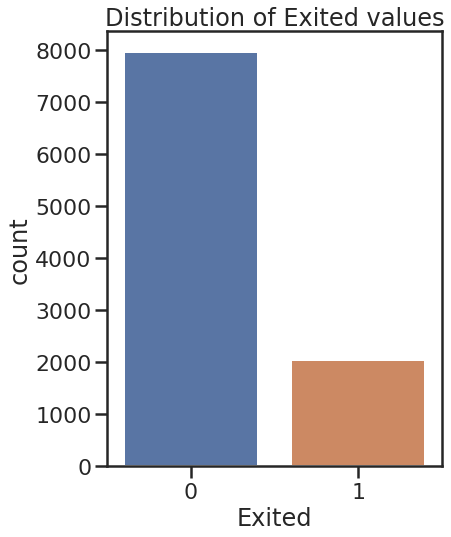

In [356]:
plot_countplot(df,"Exited")

Now we will look into distributions of continous variables.

In [357]:
def plot_histogram(x0,x1 = None,bins=None):
  fig = go.Figure()
  if x1 is not None:
    fig.add_trace(go.Histogram(x=x0,name="Didn't exit",histnorm='probability density',nbinsx=bins))
    fig.add_trace(go.Histogram(x=x1,name="Exited",histnorm='probability density',nbinsx=bins))
  else:
    fig.add_trace(go.Histogram(x=x0,histnorm='probability density',nbinsx=bins))
  fig.update_layout(barmode='overlay',title="{}".format(x0.name))
  fig.update_traces(opacity=0.5)
  fig.show()


In [358]:
def calculate_cohen_d(dist_1,dist_2):
  d = (np.average(dist_1) - np.average(dist_2))/np.sqrt((len(dist_1) * np.var(dist_1) + len(dist_2) * np.var(dist_2))/(len(dist_1) + len(dist_2) - 2))
  print("Absolute value of Cohen's d: {}\n{} effect size".format(np.abs(d),
                                                                 "Very Low" if (np.abs(d) <= 0.2) else 
                                                                 "Low" if (np.abs(d) > 0.2 and np.abs(d) <= 0.5) else 
                                                                 "Medium" if (np.abs(d) > 0.5 and np.abs(d) <= 0.8) else 
                                                                 "High"))

In [359]:
plot_histogram(df["CreditScore"],bins=50)

The distribution shows most of our customers have around 600 - 720 credit score. We can also notice a peak around 840-860 credit score.

In [360]:
plot_histogram(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"],50)

In [361]:
calculate_cohen_d(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])

Absolute value of Cohen's d: 0.06728959284882163
Very Low effect size


In [362]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])
print("U-statistic for credit score given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for credit score given the customer exited or not: 7839548.0
P-value: 0.00993433058636417
Two groups come from the same population (based on the mann whitney U test at 1% significance level)


When it comes to conditional disrtibution when it comes to credit score whether the customer exited, they overlap a lot. We can see that people that had less than 400 credit score exited the company. Other than that these distribution seem to be closely related.

In [363]:
plot_histogram(df["Age"],bins=50)

Like we saw before the distribution of the age seems to be slighly right skewed. We will try to apply some transformations to normalize the distribution of this variable.

In [364]:
plot_histogram(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"],50)

As we can see, The conditional disrtibutions when it comes to age of the cutomer whether the customer exited, do not overlap a whole bunch. That might mean that age of customer might have a big impact on whether he will leave. Older customers tend to leave the company more frequently than the younger customers. That's definitely something that I will keep in mind for future analysis in this project.

In [365]:
calculate_cohen_d(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"])

Absolute value of Cohen's d: 0.7390919905296035
Medium effect size


In [366]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"])
print("U-statistic for age given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for age given the customer exited or not: 4345981.5
P-value: 1.6052007159685838e-230
Two groups do not come from the same population (based on the mann whitney U test at 1% significance level)


In [367]:
plot_histogram(df["Balance"],bins=50)

This plot confirms what we saw earlier on. 1/3 of customers have null balance. Let's see how it relates to customer leaving

In [368]:
plot_histogram(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"],50)

So what we can note from that is that people with null balance leave less often than not.

In [369]:
calculate_cohen_d(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])

Absolute value of Cohen's d: 0.29636961846423865
Low effect size


In [370]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])
print("U-statistic for balance given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for balance given the customer exited or not: 6849444.5
P-value: 5.579199689574611e-29
Two groups do not come from the same population (based on the mann whitney U test at 1% significance level)


In [371]:
plot_histogram(df['EstimatedSalary'],bins=50)

We can see that estimated salary of customers in our dataset follows a distribution that looks closely like uniform distribution.

In [372]:
plot_histogram(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'],50)

What we can see from the conditional distributions, is that they overlap a lot. We can see a bigger peak around 187 - 192 k of estimated salary when it comes to customers exiting, but other than that we can't really distinguish bigger differences between these distributions.

In [373]:
calculate_cohen_d(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'])

Absolute value of Cohen's d: 0.03003496730651614
Very Low effect size


In [374]:
mwu = mannwhitneyu(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'])
print("U-statistic for estimated salary given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for estimated salary given the customer exited or not: 7969863.0
P-value: 0.11352575465076892
Two groups come from the same population (based on the mann whitney U test at 1% significance level)


Next up, let's view some boxplots to see some potential anomalies in our dataset

In [375]:
def plot_boxplot(y0,y1=None):
  fig = go.Figure()
  if y1 is not None:
    fig.add_trace(go.Box(x=y0,name="Didn't exit"))
    fig.add_trace(go.Box(x=y1,name="Exited"))
  else:
    fig.add_trace(go.Box(x=y0,name=y0.name))
  fig.update_layout(title="{}".format(y0.name))
  fig.show()

In [376]:
plot_boxplot(df["CreditScore"])

We can notice that some of the smaller amounts of credit score are lower than the lower fence of the variable. Lets view how it relates to conditional variables combined with our target variable

In [377]:
plot_boxplot(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])

As we noticed earlier through the distribution of the variable, people with really low credit score compared to the rest of our customers tend to leave the company. Usually people with this low of a credit score have bad payment history so only based on the this one variable we might not be as concerned about these customers leaving.

In [378]:
plot_boxplot(df["EstimatedSalary"])

Based on the boxplot, we can't really see any anomalies in the estimated salaray variable. The histogram that we were looking at earlier also didn't show any signs of outliers. Let's see how it relates to the target variable

In [379]:
plot_boxplot(df[df["Exited"] == 0]["EstimatedSalary"],df[df["Exited"] == 1]["EstimatedSalary"])

Same story here as with the histogram. These two boxplots show basically no relation to the target variable

In [380]:
plot_boxplot(df["Tenure"])

When it comes to the tenure variable we also can not distinguish any anomalies

In [381]:
plot_boxplot(df[df["Exited"] == 0]["Tenure"],df[df["Exited"] == 1]["Tenure"])

This plot shows us that 25% of people who didn't exit had a tenure between 3 and 5 years, while the same value for people who did exit lies between 2 and 5 years. Another 25 % of people who didn't exit lie between 5 and 7 years, while people who did exit between 5 and 8 years. That might indicate some type of threshhold that may be important to keep in mind in the future aspects. 

In [382]:
plot_boxplot(df["Balance"])

In [383]:
plot_boxplot(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])

This graph tells us basically the same story that the histogram showed. People who exited tend to have higher balance in their account.



---


Next up, we will explore more of the categorical side of our data.


In [384]:
def plot_barplot(df,x,y,color=None):
  vals = df.groupby(x).sum()[y].values
  df[y] = df[y].apply(lambda c: str(np.round((c / vals[0]) * 100)) + "%" if df[df[y] == c][x].values[0] == 0 else str(np.round((c / vals[1]) * 100)) + "%")
  fig = px.bar(df, x=x, y="Balance",color=color,hover_data=[x, color],title="{} vs {}".format(x,color),text=y,color_continuous_scale=["red", "green", "blue"])

  fig.update_traces(marker_line_width=1.5, opacity=0.6,textposition='inside', textfont_size=14,textfont_color="white")
  fig.show()

In [385]:
def test_contigency(table,v1,v2):
  chi2, p, dof, ex = chi2_contingency(table)
  print("Chi-squared test for significance\nH0: There's no relationship between the variable {} and {}. These variables are indepedent.\
  \nH1: There's relationship between the variable {} and {}. These variables are depedent.\nChi-square statistic: {}\nP-value: {}\nThese variables are {}DEPENDENT on the 5% level of significance.".format(v1,v2,v1,v2,round(chi2,2),round(p,2),"IN" if p > 0.05 else ""))
  try:
    table = sm.stats.Table2x2(table)
    print("*"*250)
    print("Summary of the odds ratio statistics")
    print(table.summary())
  except:
    print("*"*250)


In [386]:
plot_barplot(df.groupby(["Exited","cat_Balance"]).count().reset_index(),"Exited","Tenure","cat_Balance")

As we can see, people with null balance don't leave quite as often as people with positive balance. Of course It might to due to insufficient amount of data with respect to people who did leave the bank. But apart from that, one reason that I see in such a relationship are big companies using the bank services and taking advantage of so called 'zero balance accounts' (ZBA in short). Such a strategy might serve a lot of advantages for bigger companies which use the bank services. Here's the link that you can read more about. [More about ZBA](https://www.investopedia.com/terms/z/zba.asp)

In [387]:
test_contigency(sm.stats.Table.from_data(df[["cat_Balance","Exited"]]).table_orig.to_numpy(),"cat_Balance","Exited")

Chi-squared test for significance
H0: There's no relationship between the variable cat_Balance and Exited. These variables are indepedent.  
H1: There's relationship between the variable cat_Balance and Exited. These variables are depedent.
Chi-square statistic: 149.08
P-value: 0.0
These variables are DEPENDENT on the 5% level of significance.
**********************************************************************************************************************************************************************************************************************************************************
Summary of the odds ratio statistics
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.977       1.770 2.208   0.000
Log odds ratio    0.682 0.056 0.571 0.792   0.000
Risk ratio        1.135       1.114 1.157   0.000
Log risk ratio    0.127 0.010 0.108 0.146   0.000
-------------------------------------------------


From the odds ratio statistic we can conclude that the chance that a customer leaves the bank, given they have a positive balance is around 2 times higher than the customer leaving, given they have a null balance.

In [388]:
plot_barplot(df.groupby(["Exited","Gender"]).count().reset_index(),"Exited","Tenure","Gender")

As we can see, there is a relationship between the gender and the customer leaving the bank. Females tend to leave more ofthen than man. Let's look into more statistical way of assesing the relationship.

In [389]:
test_contigency(sm.stats.Table.from_data(df[["Gender","Exited"]]).table_orig.to_numpy(),"Gender","Exited")

Chi-squared test for significance
H0: There's no relationship between the variable Gender and Exited. These variables are indepedent.  
H1: There's relationship between the variable Gender and Exited. These variables are depedent.
Chi-square statistic: 112.92
P-value: 0.0
These variables are DEPENDENT on the 5% level of significance.
**********************************************************************************************************************************************************************************************************************************************************
Summary of the odds ratio statistics
               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.589        0.534  0.649   0.000
Log odds ratio   -0.530 0.050 -0.628 -0.432   0.000
Risk ratio        0.897        0.879  0.915   0.000
Log risk ratio   -0.109 0.010 -0.129 -0.088   0.000
---------------------------------------------------


From the odds ratio statistic we can conclude that the chance that a customer leaves the bank, given they are male is around 0.6 times lower than the customer leaving, given they are female.

In [390]:
plot_barplot(df.groupby(["Exited","IsActiveMember"]).count().reset_index(),"Exited","Tenure","IsActiveMember")

As we can see 64% of customers who left were not a active member, compared to 45% who were not a active member but did not leave.

In [391]:
test_contigency(sm.stats.Table.from_data(df[["IsActiveMember","Exited"]]).table_orig.to_numpy(),"IsActiveMember","Exited")

Chi-squared test for significance
H0: There's no relationship between the variable IsActiveMember and Exited. These variables are indepedent.  
H1: There's relationship between the variable IsActiveMember and Exited. These variables are depedent.
Chi-square statistic: 242.99
P-value: 0.0
These variables are DEPENDENT on the 5% level of significance.
**********************************************************************************************************************************************************************************************************************************************************
Summary of the odds ratio statistics
               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.453        0.410  0.501   0.000
Log odds ratio   -0.791 0.051 -0.892 -0.690   0.000
Risk ratio        0.853        0.836  0.871   0.000
Log risk ratio   -0.159 0.010 -0.179 -0.138   0.000
------------------------------------------------

From the odds ratio statistic we can conclude that the chance that a customer leaves the bank, given they are an active member is around 0.45 times lower than the customer leaving, given they are not an active customer.

In [392]:
plot_barplot(df.groupby(["Exited","HasCrCard"]).count().reset_index(),"Exited","Tenure","HasCrCard")

From this bar plot, we can notice that there might not be a relation to customer leaving the bank and customer owning a credit card. Let's test it.

In [393]:
test_contigency(sm.stats.Table.from_data(df[["HasCrCard","Exited"]]).table_orig.to_numpy(),"HasCrCard","Exited")

Chi-squared test for significance
H0: There's no relationship between the variable HasCrCard and Exited. These variables are indepedent.  
H1: There's relationship between the variable HasCrCard and Exited. These variables are depedent.
Chi-square statistic: 0.47
P-value: 0.49
These variables are INDEPENDENT on the 5% level of significance.
**********************************************************************************************************************************************************************************************************************************************************
Summary of the odds ratio statistics
               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        0.962        0.865 1.070   0.475
Log odds ratio   -0.039 0.054 -0.145 0.068   0.475
Risk ratio        0.992        0.971 1.014   0.478
Log risk ratio   -0.008 0.011 -0.030 0.014   0.478
--------------------------------------------------


As we saw previously, there is no relationship between these variables.

In [394]:
plot_barplot(df.groupby(["Exited","NumOfProducts"]).count().reset_index(),"Exited","Tenure","NumOfProducts")

We can see a couple of things from this plot. Customer with more than 2 products tend to leave the bank more often than people with 2 or less products. Although people with 1 product tend to leave way more often than people with 2 products.

In [395]:
test_contigency(sm.stats.Table.from_data(df[["NumOfProducts","Exited"]]).table_orig.to_numpy(),"NumOfProducts","Exited")

Chi-squared test for significance
H0: There's no relationship between the variable NumOfProducts and Exited. These variables are indepedent.  
H1: There's relationship between the variable NumOfProducts and Exited. These variables are depedent.
Chi-square statistic: 1503.63
P-value: 0.0
These variables are DEPENDENT on the 5% level of significance.
**********************************************************************************************************************************************************************************************************************************************************


In [396]:
plot_barplot(df.groupby(["Exited","Geography"]).count().reset_index(),"Exited","Tenure","Geography")

As we can see, customers from France tend to leave the same amount as the customers from Germany. Although we have to keep in mind that we have way less customers in Germany than in France, which implies that our customers from Germany tend to leave a lot more often than other places.

In [397]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'cat_Balance'],
      dtype='object')

In [398]:
df["iso_alpha"] = df["Geography"].apply(lambda x: "DEU" if x == "Germany" else "ESP" if x == "Spain" else "FRA")

In [399]:
def plot_map(df,color):
  fig = px.choropleth(df, locations="iso_alpha",
                    color=color, color_continuous_scale=px.colors.sequential.Viridis)
  fig.update_geos(scope="europe")
  fig.show()

In [400]:
plot_map(df.groupby("iso_alpha").mean().reset_index(),"Exited")

In [401]:
plot_map(df.groupby("iso_alpha").mean().reset_index(),"Balance")

In [402]:
df.drop(columns=["iso_alpha"],inplace=True)

As we can see, customers from Germany tend to leave 2 times more often on average, but also 2 times higher balance than the other countries. That's something that we have to take a note of. 



---

Let's explore the bivariate relationship with continous variables.


In [403]:
def plot_bubble_chart(df,x,y,color=None):
  fig = px.scatter(df, x=x, y=y,
         color = color,color_continuous_scale=["red", "green", "blue"])
  fig.update_layout(
  title='{} vs {}'.format(x,y),
  xaxis=dict(
      title=x,
      gridcolor='white',
      gridwidth=2,
  ),
  yaxis=dict(
      title=y,
      gridcolor='white',
      gridwidth=2,
  ),
  paper_bgcolor='rgb(255,255,255)',
  plot_bgcolor='rgb(255,255,255)',
  height = 600,
  width = 1000
  )
  fig.show()

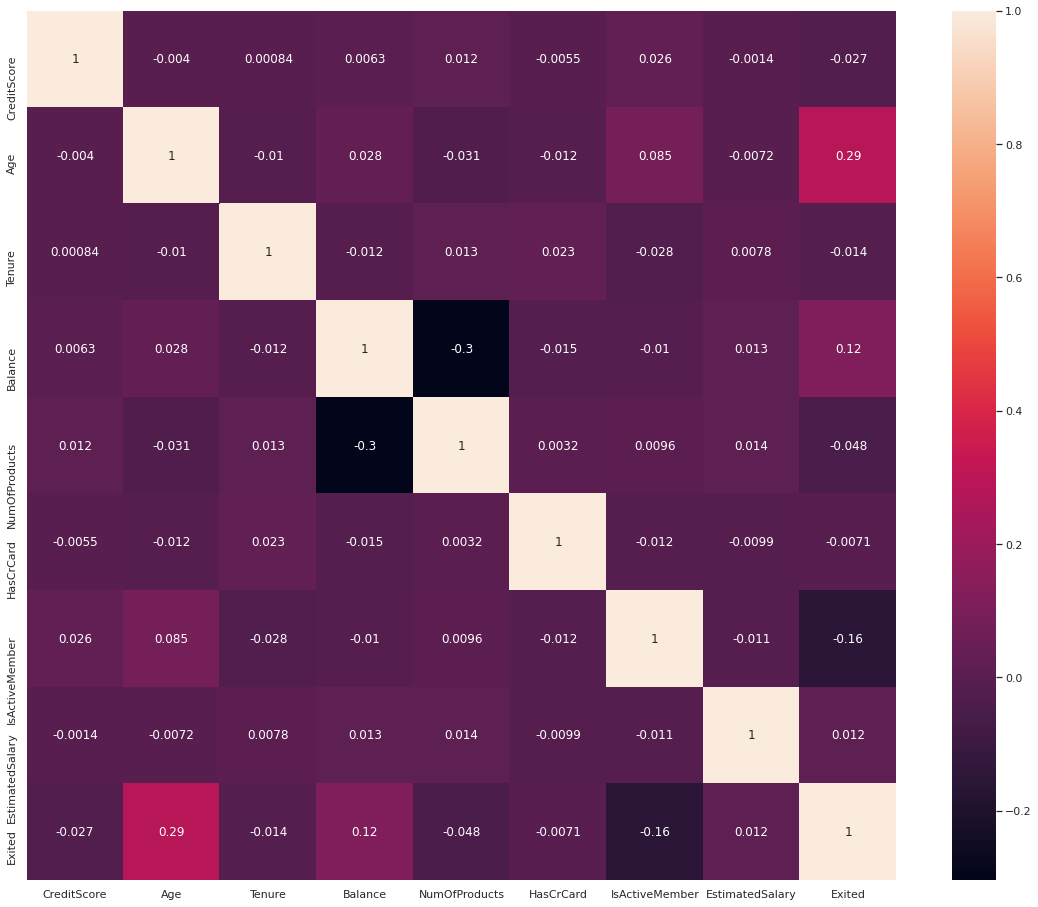

In [404]:
sns.set(font_scale=1)
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, vmax=1, square=True,annot = True)

In [405]:
plot_bubble_chart(df,"Balance","EstimatedSalary","Exited")

In [406]:
plot_bubble_chart(df,"Balance","EstimatedSalary","Geography")

In [407]:
plot_bubble_chart(df,"CreditScore","EstimatedSalary","Geography")

In [408]:
plot_bubble_chart(df,"Balance","EstimatedSalary","NumOfProducts")

In [409]:
plot_bubble_chart(df,"Balance","EstimatedSalary","HasCrCard")

In [410]:
plot_bubble_chart(df,"Age","EstimatedSalary","Exited")

In [411]:
plot_bubble_chart(df,"Age","Balance","Exited")

In [412]:
plot_bubble_chart(df,"Age","Tenure","Exited")

In [413]:
plot_bubble_chart(df,"CreditScore","EstimatedSalary","Exited")

In [414]:
plot_bubble_chart(df,"CreditScore","EstimatedSalary","Gender")

We can't really uncover any patterns that we didn't see before in those plots. That said we will move onto the feature engineering stage.

---



# **Feature engineering**

In [415]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [416]:
df['cat_Balance'].unique()

array(['Null balance', 'Positive balance'], dtype=object)

In [417]:
df = pd.get_dummies(df,prefix=['country'], columns = ['Geography'], drop_first=True)

In [418]:
df['cat_Balance'] = df['cat_Balance'].apply(lambda x: 0 if x == "Null balance" else 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



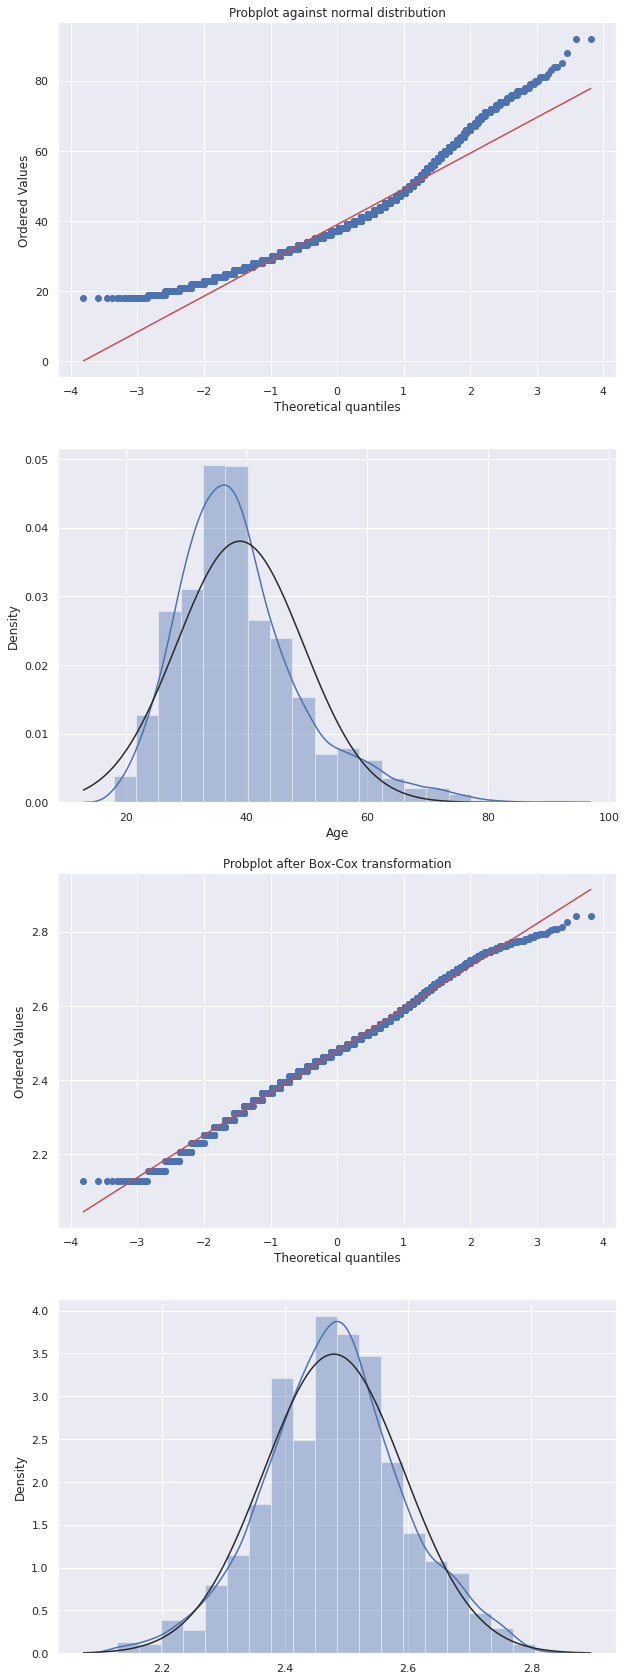

In [419]:
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_subplot(411)
stats.probplot(df["Age"], dist=stats.norm,plot=ax1)
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(412)
sns.distplot(df["Age"],bins = 20,fit=norm)
ax3 = fig.add_subplot(413)
x, _ = stats.boxcox(df["Age"])
stats.probplot(x, dist=stats.norm,plot=ax3)
ax3.set_title('Probplot after Box-Cox transformation')
ax4 = fig.add_subplot(414)
sns.distplot(x,bins = 20,fit=norm)

In [420]:
df["Age_BC"], _ = stats.boxcox(df["Age"])

In [421]:
df.drop(columns=["Age"],inplace=True)

In [422]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x=="Female" else 0)

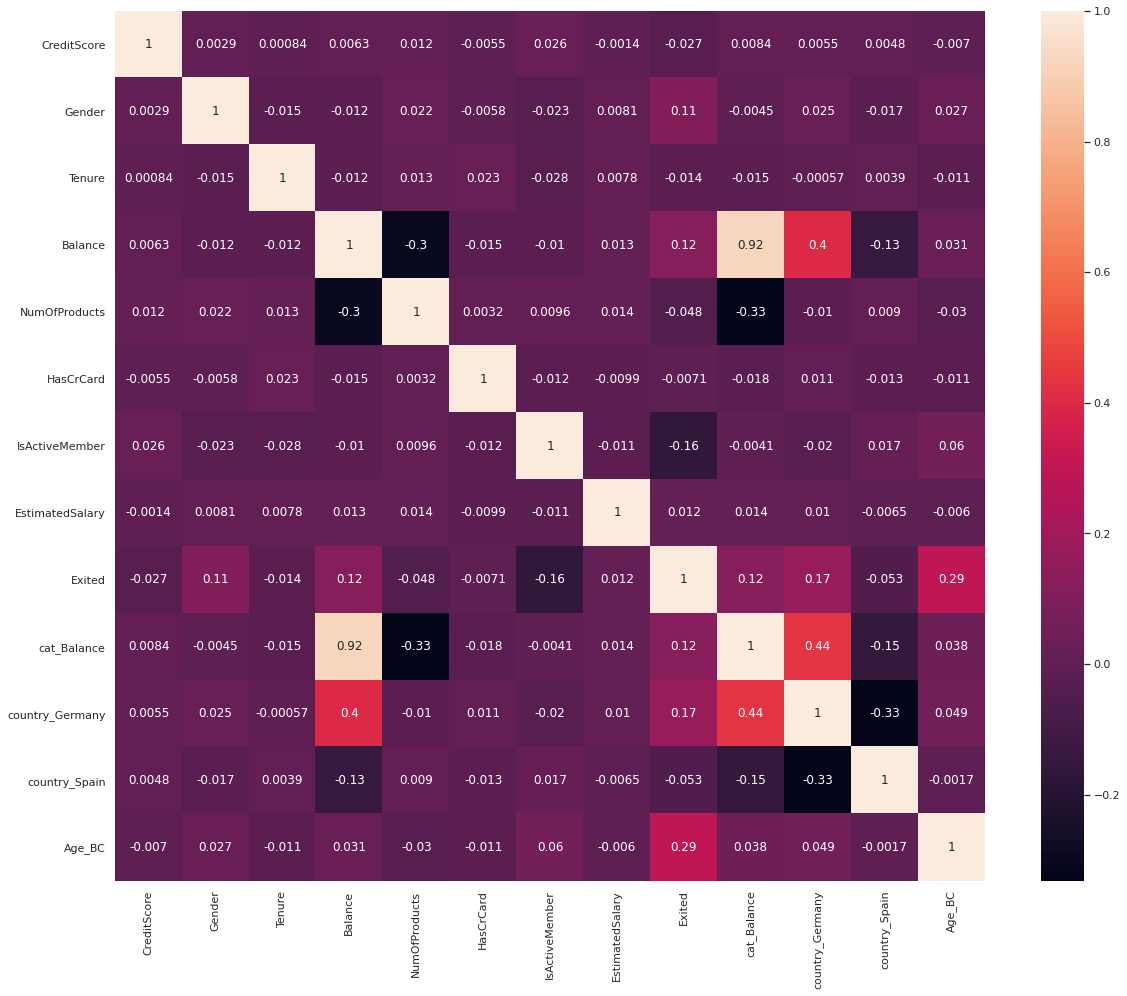

In [423]:
sns.set(font_scale=1)
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, vmax=1, square=True,annot = True)

In [424]:
X,y = df[[x for x in df.columns if x != "Exited"]],df["Exited"]

In [425]:
X.shape

(10000, 12)

In [426]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)

In [427]:
X.head()

CreditScore  Gender  Tenure  ...  country_Germany  country_Spain    Age_BC
0          619       1       2  ...                0              0  2.530867
1          608       1       1  ...                0              1  2.520415
2          502       1       8  ...                0              0  2.530867
3          699       1       1  ...                0              0  2.498541
4          850       1       2  ...                0              1  2.541019

[5 rows x 12 columns]

In [428]:
pd.DataFrame(X_new).head()

0    1          2    3          4    5
0  619.0  1.0       0.00  1.0  101348.88  0.0
1  608.0  1.0   83807.86  1.0  112542.58  0.0
2  502.0  1.0  159660.80  0.0  113931.57  0.0
3  699.0  1.0       0.00  0.0   93826.63  0.0
4  850.0  1.0  125510.82  1.0   79084.10  0.0

In [429]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
for i in range(8):
  print(sorted(zip(clf.feature_importances_,X.columns),reverse=True)[i])

(0.22802945198233218, 'Age_BC')
(0.14845464682335016, 'NumOfProducts')
(0.13555720279615602, 'EstimatedSalary')
(0.13421556442316737, 'CreditScore')
(0.11378337713504084, 'Balance')
(0.10676158736637902, 'Tenure')
(0.03643854255913694, 'IsActiveMember')
(0.027882483422318485, 'country_Germany')


In [430]:
cols_clf = [str(x[1]) for x in sorted(zip(clf.feature_importances_,X.columns),reverse=True)[:6]]

In [431]:
cols_pearson = [c[0] for c in corr_matrix["Exited"].apply(lambda x: np.abs(x)).sort_values(ascending = False)[1:7].reset_index().to_numpy() if c[0] != "cat_Balance"]

In [432]:
X.columns

Index(['CreditScore', 'Gender', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'cat_Balance',
       'country_Germany', 'country_Spain', 'Age_BC'],
      dtype='object')

In [433]:
cols_chi2 = ["CreditScore",'Gender',"Balance","IsActiveMember","EstimatedSalary","country_Germany"]

In [434]:
cols_clf

['Age_BC',
 'NumOfProducts',
 'EstimatedSalary',
 'CreditScore',
 'Balance',
 'Tenure']

In [435]:
cols_pearson

['Age_BC', 'country_Germany', 'IsActiveMember', 'Balance', 'Gender']

In [436]:
cols_chi2

['CreditScore',
 'Gender',
 'Balance',
 'IsActiveMember',
 'EstimatedSalary',
 'country_Germany']

In [437]:
new_columns = set(cols_clf + cols_pearson + cols_chi2)

In [438]:
new_columns = list(new_columns)

In [439]:
X = X[new_columns]

In [440]:
X.shape

(10000, 9)

In [441]:
y[y == 1].shape,y[y == 0].shape

((2037,), (7963,))

In [442]:
columns = X.columns

In [443]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [444]:
X = pd.DataFrame(X,columns=columns)

In [445]:
X.sample(5)

Age_BC   Balance  Tenure  ...  country_Germany  IsActiveMember  CreditScore
2416  0.619285  0.468877     0.9  ...              0.0             0.0        1.000
9954  0.606218  0.619445     0.6  ...              0.0             1.0        0.590
6863  0.203903  0.596227     0.6  ...              0.0             1.0        0.428
3084  0.353250  0.000000     0.8  ...              0.0             0.0        0.840
9794  0.174560  0.657249     0.5  ...              0.0             0.0        0.670

[5 rows x 9 columns]

# **SMOTE**

SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than your typical oversampling.
In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.
For a reason above, new technique was introduced to create synthetic data for oversampling purposes in their SMOTE paper.
SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then made between the random data and the randomly selected k-nearest neighbor. The procedure is repeated enough times until the minority class has the same proportion as the majority class. That's just a basic overview of this powerfull algorithm. [Read more about SMOTE](https://www.hindawi.com/journals/mpe/2019/3526539/)

In [446]:
smote = SMOTE(sampling_strategy = 'minority')

In [447]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [448]:
X_s,y_s = smote.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [449]:
X = pd.DataFrame(X_s,columns=X.columns)

In [450]:
X.tail()

Age_BC   Balance  ...  IsActiveMember  CreditScore
15921  0.567713  0.753199  ...             0.0     0.639371
15922  0.571051  0.000000  ...             1.0     0.632881
15923  0.438926  0.406304  ...             0.0     0.488846
15924  0.753713  0.321720  ...             0.0     0.152446
15925  0.606218  0.000000  ...             0.0     0.344545

[5 rows x 9 columns]

In [451]:
y= pd.Series(y_s)

In [452]:
y.value_counts()

1    7963
0    7963
dtype: int64

In [453]:
y.shape[0] == X.shape[0]

True

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=178,stratify=y)

# **Model building**

Now it's time to build the model. For this project I decided to go with an ANN approach. It might not be the most suitable algorithm for this problem (we could also try some typical classification machine learning algorithms like SVM,Random forest, XGB etc.) Although, since ANN is the big thing in churn modeling I really wanted to go with this model approach.

## **ANN**


In [318]:
X_train.shape

(12740, 9)

In [319]:
def build_model(hp):
  model = Sequential([
      Dense(units = hp.Int("dense_1",min_value = 512, max_value = 1024,step=64), activation='elu',\
            input_dim = X_train.shape[1]),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units =hp.Int("dense_2",min_value = 256, max_value = 512,step=64), activation='elu'),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units = hp.Int("dense_3",min_value = 128, max_value = 256,step=64), activation='elu'),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units = hp.Int("dense_4",min_value = 64, max_value = 128,step=32), activation='elu'),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units = 32, activation='elu'),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units = 16, activation='elu'),
      Dropout(0.4),
      BatchNormalization(),
      Dense(units = 1, activation='sigmoid')
  ])




  model.compile(loss='binary_crossentropy',optimizer=Adam(hp.Choice("lr",values=[1e-2,1e-3,1e-4])),metrics=['accuracy'])
  return model

In [320]:
tuner_search = RandomSearch(build_model,objective="val_accuracy",max_trials=15)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [311]:
tuner_search.search(X_train,y_train,batch_size=128,epochs=50,validation_split=0.2,validation_batch_size=128,verbose=1)

Trial 15 Complete [00h 00m 29s]
val_accuracy: 0.797095775604248

Best val_accuracy So Far: 0.8069073557853699
Total elapsed time: 00h 07m 29s
INFO:tensorflow:Oracle triggered exit


In [321]:
model = tuner_search.get_best_models()[0]

In [322]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               6400      
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 640)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               328192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6

In [323]:
history = model.fit(X_train,y_train,batch_size=128,epochs=1000,validation_split=0.2,validation_batch_size=128,verbose=1)

Epoch 1/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.4482 - accuracy: 0.8001 - val_loss: 0.4211 - val_accuracy: 0.8018
Epoch 2/1000
80/80 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.7943 - val_loss: 0.4634 - val_accuracy: 0.7641
Epoch 3/1000
80/80 [==============================] - 0s 6ms/step - loss: 0.4426 - accuracy: 0.7953 - val_loss: 0.4211 - val_accuracy: 0.8002
Epoch 4/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.4499 - accuracy: 0.7944 - val_loss: 0.4496 - val_accuracy: 0.7877
Epoch 5/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.4463 - accuracy: 0.7955 - val_loss: 0.4241 - val_accuracy: 0.8034
Epoch 6/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.4449 - accuracy: 0.7965 - val_loss: 0.4290 - val_accuracy: 0.7924
Epoch 7/1000
80/80 [==============================] - 0s 6ms/step - loss: 0.4415 - accuracy: 0.7958 - val_loss: 0.4227 - val_accuracy: 0.8053
Epoch 

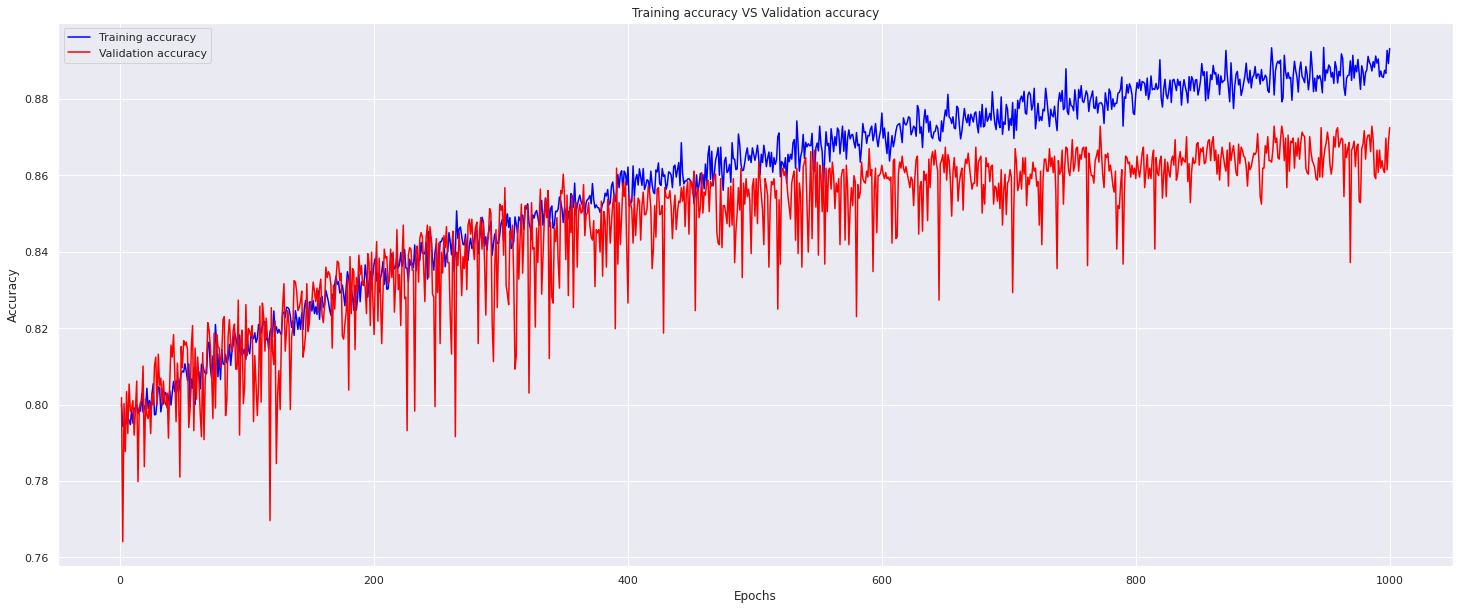

In [324]:
plt.figure(figsize=(25,10))
plt.plot(range(1,1001),history.history['accuracy'],color="blue", label="Training accuracy", linestyle="-")
plt.plot(range(1,1001),history.history['val_accuracy'],color="red", label="Validation accuracy", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training accuracy VS Validation accuracy")
plt.legend()
plt.show()

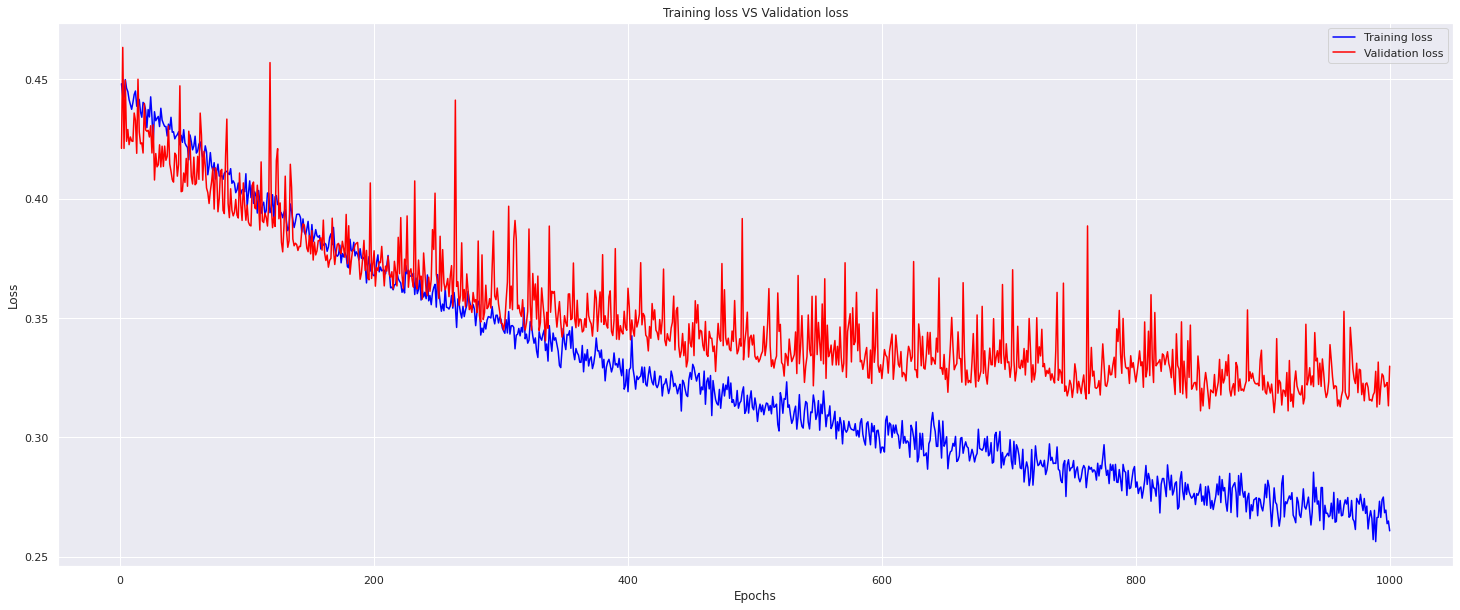

In [325]:
plt.figure(figsize=(25,10))
plt.plot(range(1,1001),history.history['loss'],color="blue", label="Training loss", linestyle="-")
plt.plot(range(1,1001),history.history['val_loss'],color="red", label="Validation loss", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training loss VS Validation loss")
plt.legend()
plt.show()

In [326]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8562


[0.35636553168296814, 0.8562460541725159]

In [327]:
y_pred = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [328]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.81      0.93      0.87      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [329]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1250,  343],
       [ 115, 1478]])

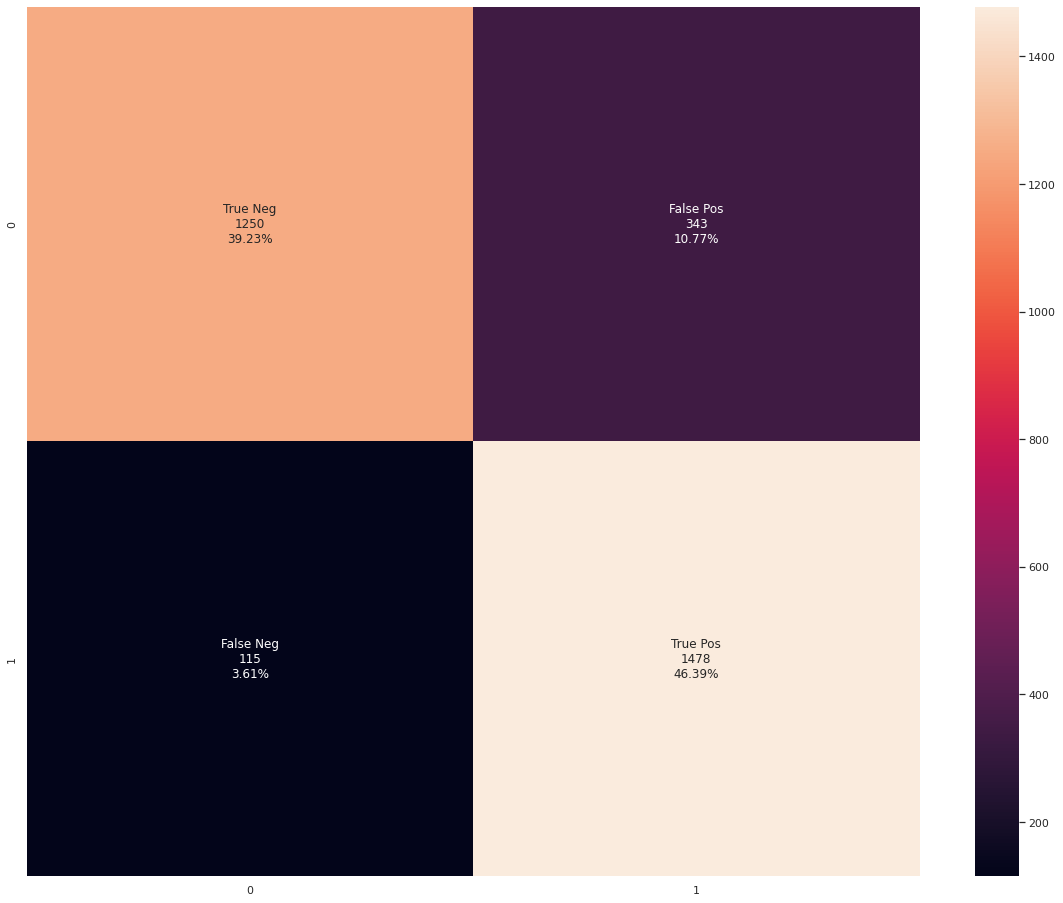

In [330]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.subplots(figsize=(20, 16))
sns.heatmap(cm, annot=labels, fmt='')

In [331]:
model.save("/content/drive/My Drive/ChurnModel/best_model.h5")

In [333]:
def plot_roc_auc_curve(model,X,y):
  
  y_score = model.predict_proba(X)

  fpr, tpr, thresholds = roc_curve(y, y_score)

  fig = px.area(
      x=fpr, y=tpr,
      title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='False Positive Rate', y='True Positive Rate'),
      width=1400, height=700
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  
  fig.show()


In [455]:
plot_roc_auc_curve(model,X_test,y_test)

---

<p align=center>
Overall, I think that I was able to achieve pretty good results through building and tuning the model. Although, I do think that there are a some aspects that could have yielded a better result at the end of the day. <br>


---


Some of these techniques are:


*   Using some callback methods like EarlyStopping, since we can clearly see that the model overfits the data at some point in training.
*   Applying some weights onto the data with customers who did not leave, since we can see that model has problems with data of customers who didn't churn. It might be also due to the algorithm used to balance the data. That's also something that I could experiment with.
*   Further parameter tuning in terms of model architecture.Although I managed to achieve pretty good metrics score, some further parameter tuning might help in addressing the overfitting problem of the ANN.



---


# **Thanks for reading!**